In [146]:
# Beer dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [147]:
#How would you cluster these beers?

X = beer.drop('name',axis=1)
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [148]:
#How would you cluster these beers

Part 1: K-means clustering

In [149]:
# Cluster the beers
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [150]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [151]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')


C:\PythonCanopy\User\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


In [152]:
# Clusters are based on centres
# review the cluster centers
km.cluster_centers_

array([[ 150.        ,   17.        ,    4.52142857,    0.52071429],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ]])

In [153]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [154]:
# Allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14

# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    0
11    1
12    0
13    0
14    0
15    2
16    0
17    0
18    2
19    1
Name: cluster, dtype: int32

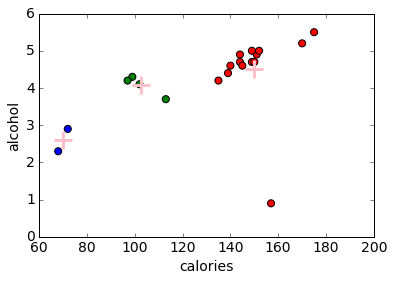

In [155]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='pink')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

beer.cluster

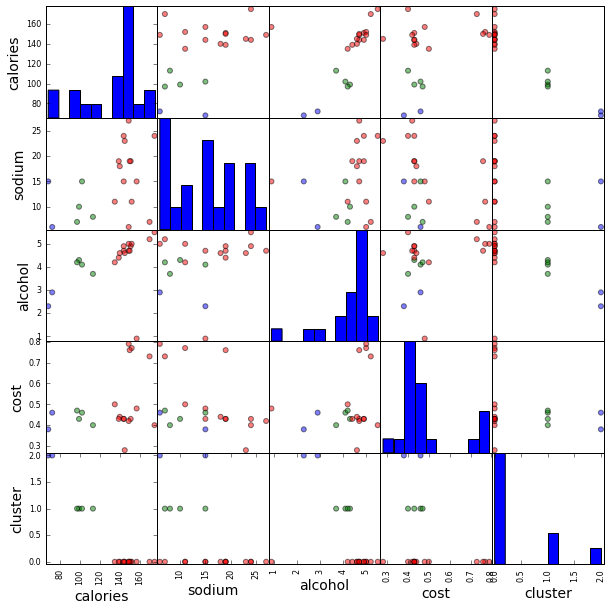

In [156]:
# scatter plot matrix (0=red, 1=green, 2=blue)
# Note the semicolon ; in below statement at the end , it suppresses the detail in output just before the plot
pd.scatter_matrix(beer, c=colors[beer.cluster], figsize=(10,10), s=100);

Repeat with scaled data

In [157]:
# Whats there in X
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


# Methods

fit(X[, y])	             Compute k-means clustering.

fit_predict(X[, y])	    Compute cluster centers and predict cluster index for each sample.

fit_transform(X[, y])	Compute clustering and transform X to cluster-distance space.

get_params([deep])	   Get parameters for this estimator.

predict(X)	           Predict the closest cluster each sample in X belongs to.

score(X[, y])	       Opposite of the value of X on the K-means objective.

set_params(**params)	Set the parameters of this estimator.

transform(X[, y])	    Transform X to a cluster-distance space.

In [158]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [159]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [160]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')
#beer.head()

C:\PythonCanopy\User\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


What are the "characteristics" of each cluster?

In [161]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


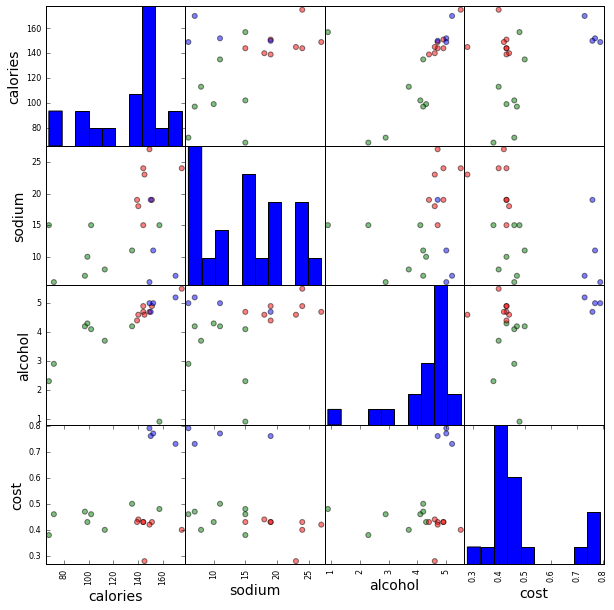

In [162]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

# Part 2: Clustering evaluation


The Silhouette Coefficient is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.
A Silhouette Coefficient is calculated for each observation:
$$SC = \frac{b-a} {max(a, b)}$$
a = mean distance to all other points in its cluster

b = mean distance to all other points in the next nearest cluster 


It ranges from -1 (worst) to 1 (best). 
A global score is calculated by taking the mean score for all observations.

In [163]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [164]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

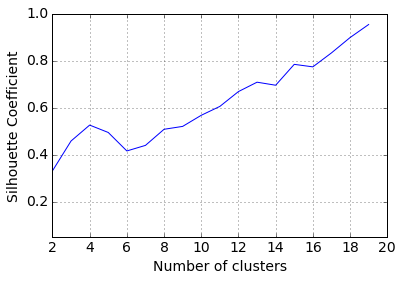

In [165]:
# plot the results
plt.plot(k_range, scores)
#plt.xlim([1,15])
plt.ylim([.05,1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [166]:
#i1= range(2,20)
#for i in i1:
#    print i,scores[i]

In [167]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster'] = km.labels_
beer.sort('cluster')

C:\PythonCanopy\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1
